In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
corr=df.corr()


In [5]:
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [6]:
df.shape


(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data = df.drop(['Surname','CustomerId','RowNumber'],axis=1)

In [10]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
data.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#this is showing that the dataset is imbalanced 
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

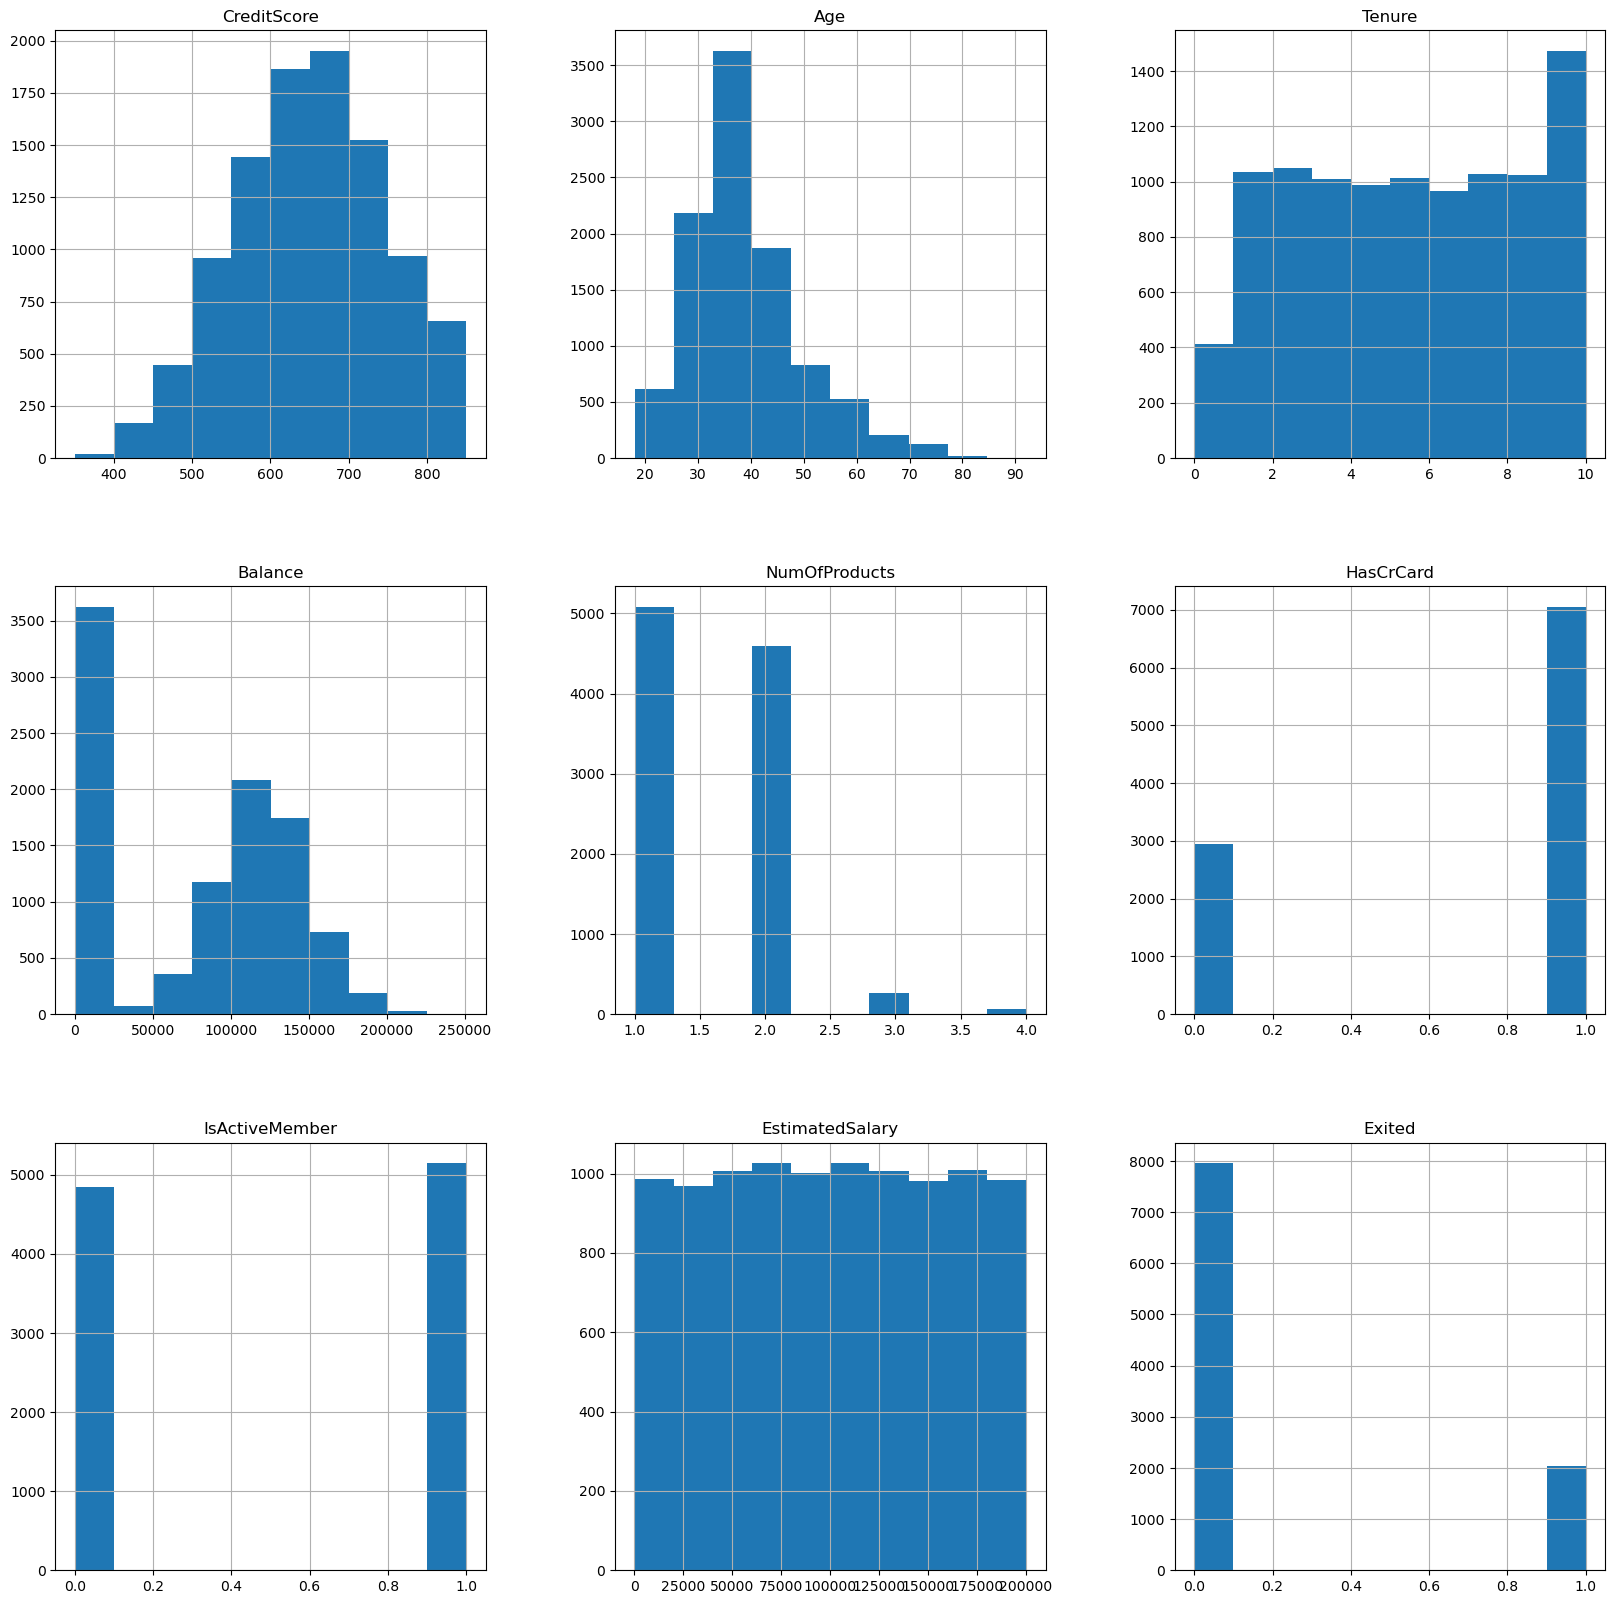

In [14]:
data.hist(figsize=(20,20))


In [15]:
%matplotlib inline

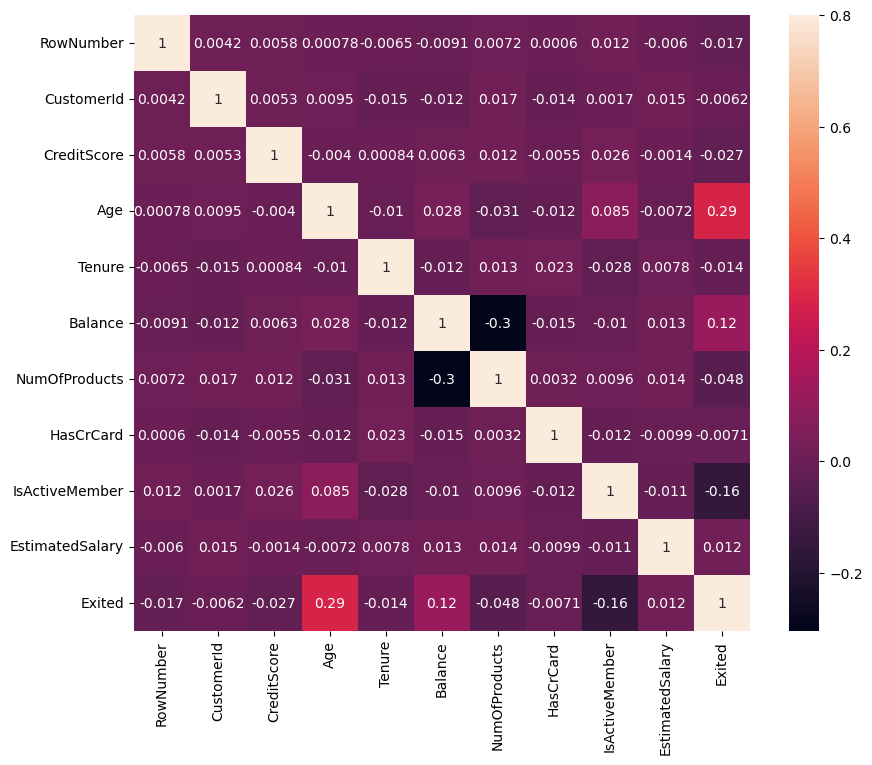

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True ,vmax = .8, square = True)
plt.show()

In [17]:

data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6092,601,Germany,Male,43,3,141859.12,2,1,1,111249.62,0
294,681,France,Male,38,3,0.00,2,1,1,112491.96,0
8109,661,France,Female,34,0,0.00,2,1,0,185555.63,0
1892,634,Germany,Female,31,8,76798.92,1,0,0,196021.73,0
1092,715,France,Male,41,4,94267.90,1,0,1,152821.12,1
3650,537,France,Male,38,3,0.00,2,0,0,141023.01,0
2090,667,Spain,Male,39,9,0.00,2,1,0,68873.80,0
9202,528,France,Male,31,9,120962.59,1,1,0,5419.31,0
930,661,Spain,Male,39,6,132628.98,1,0,0,38812.67,0
1446,637,France,Male,33,2,145731.83,1,0,1,109219.43,0


In [49]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
16,653,1,1,58,1,132602.88,1,1,0,5097.67,1


c:\Users\anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

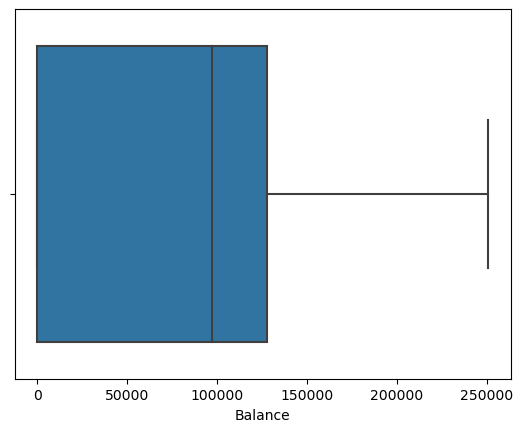

In [50]:
import seaborn as sns
sns.boxplot(df['Balance'])

c:\Users\anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

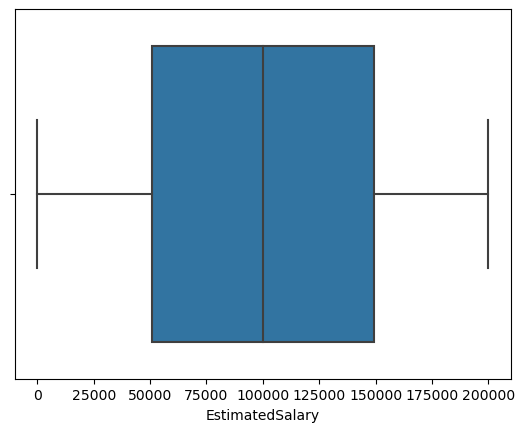

In [51]:
sns.boxplot(df['EstimatedSalary'])

c:\Users\anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

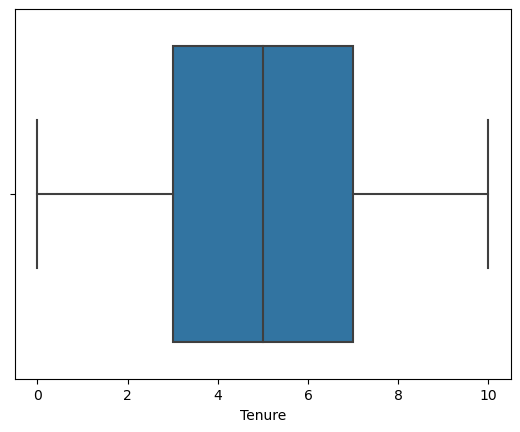

In [52]:
sns.boxplot(df['Tenure'])

In [53]:
df['Tenure'].value_counts()


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='count'>

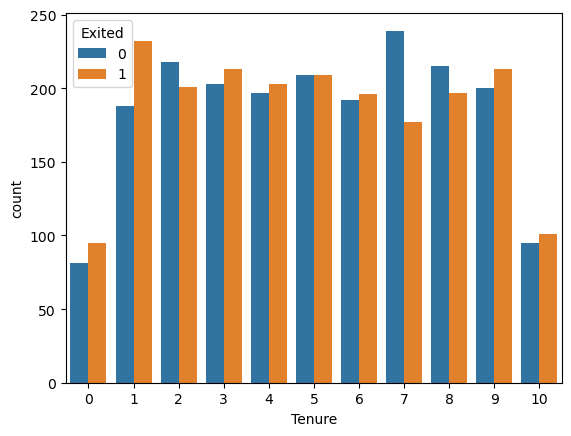

In [54]:
sns.countplot(x ='Tenure', hue = "Exited", data = data)

c:\Users\anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

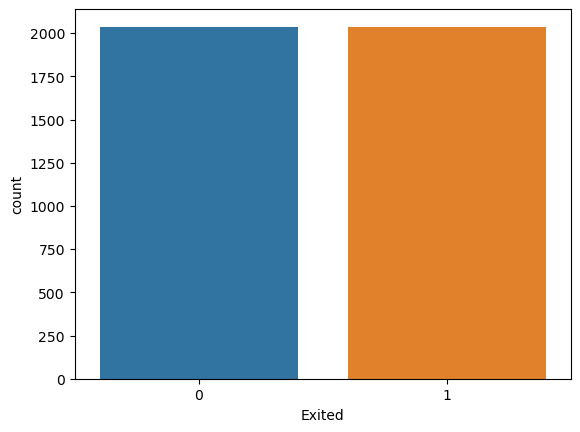

In [55]:
sns.countplot(data['Exited'])

In [59]:
print("Before Encoding",data['Geography'].unique())

Before Encoding [0 2 1]


In [57]:
label = LabelEncoder()
data['Geography'] = label.fit_transform(data['Geography'])
print("After Encoding",data['Geography'].unique())

After Encoding [0 2 1]


In [27]:
print("Before Encoding",data['Gender'].unique())

Before Encoding ['Female' 'Male']


In [28]:
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])
print("After Encoding",data['Gender'].unique())

After Encoding [0 1]


In [29]:
data.head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [30]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [31]:
zeros, ones = data.Exited.value_counts()
fr = data[data['Exited'] == 1]
nfr = data[data['Exited'] == 0]
nfr = nfr.sample(n=ones, replace=False)
data = pd.concat([fr, nfr], axis=0)



In [32]:
data['Exited'].value_counts()


1    2037
0    2037
Name: Exited, dtype: int64

In [33]:
#X = data.copy()
#X = X.drop(columns=['Exited'])
#y = data.Exited
X = data.drop('Exited', axis=1)
y = data['Exited']

In [34]:
X.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [35]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
2,502,0,0,42,8,159660.80,3,1,0,113931.57
5,645,2,1,44,8,113755.78,2,1,0,149756.71
7,376,1,0,29,4,115046.74,4,1,0,119346.88
16,653,1,1,58,1,132602.88,1,1,0,5097.67
...,...,...,...,...,...,...,...,...,...,...
2753,480,0,0,28,6,0.00,2,0,0,48131.92
822,642,2,1,34,8,0.00,1,1,0,72085.10
2631,629,0,1,35,1,172170.36,1,1,1,159777.37
8766,649,2,0,36,6,86607.39,1,0,0,19825.09


In [36]:
y

0       1
2       1
5       1
7       1
16      1
       ..
2753    0
822     0
2631    0
8766    0
1009    0
Name: Exited, Length: 4074, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.shape


(4074, 10)

In [39]:
y.shape

(4074,)

In [40]:
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.transform(X_test)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.15,random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7779141104294478

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       372
           1       0.82      0.76      0.79       443

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



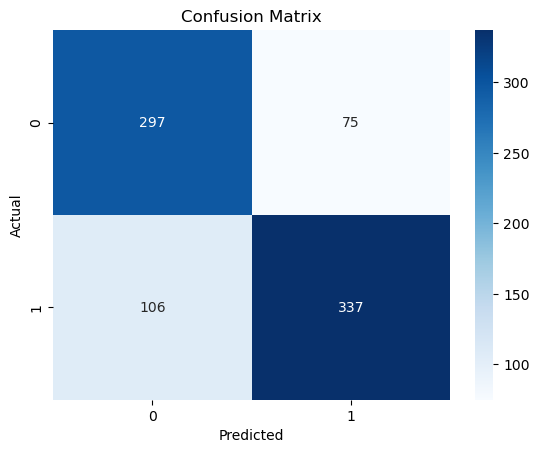

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_pred' containing your model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

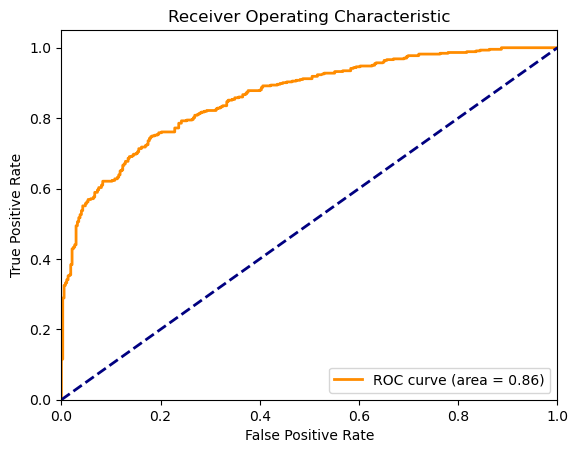

In [45]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()